In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Cargar el dataset preparado
df = pd.read_csv('../Data/dataset_preparado.csv')

## Investigacion


In [3]:
# Análisis de variables demográficas y financieras

In [4]:
demographic_factors = ['age', 'marital', 'education', 'deposit']

In [5]:
# Crear un DataFrame con las variables seleccionadas
demographic_data = df[demographic_factors]

In [6]:
# Seleccionar variables demográficas y la variable objetivo
demographic_factors = ['age', 'marital', 'education', 'deposit']

In [7]:
# Crear un DataFrame con las variables seleccionadas
demographic_data = df[demographic_factors]

In [8]:
# Visualizar estadísticas descriptivas para las variables demográficas
print(demographic_data.groupby('marital')['deposit'].value_counts(normalize=True))
print(demographic_data.groupby('education')['deposit'].value_counts(normalize=True))

marital   deposit
divorced  no         0.518948
          yes        0.481052
married   no         0.566210
          yes        0.433790
single    yes        0.543491
          no         0.456509
Name: proportion, dtype: float64
education  deposit
primary    no         0.606000
           yes        0.394000
secondary  no         0.552593
           yes        0.447407
tertiary   yes        0.541068
           no         0.458932
unknown    yes        0.507042
           no         0.492958
Name: proportion, dtype: float64


In [9]:
# Visualización de datos demográficos

/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pablobasapacheco/anaconda3/lib/python3.11

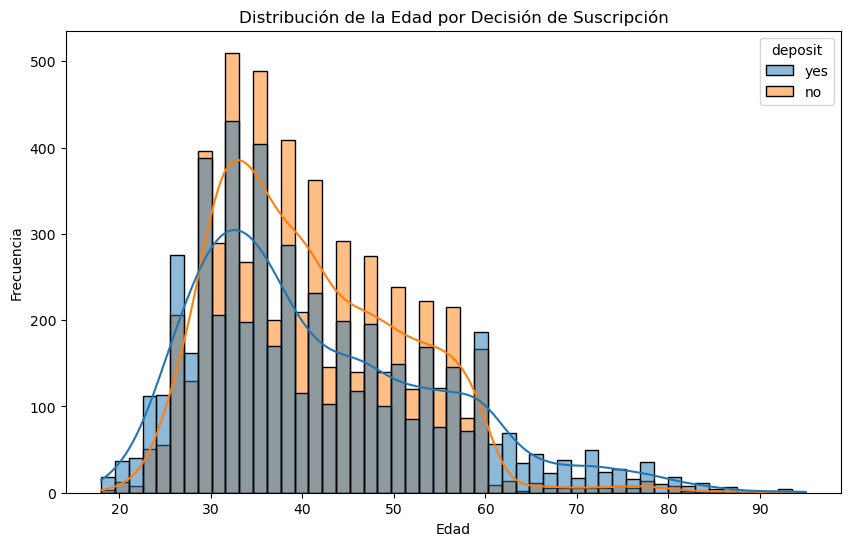

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=demographic_data, x='age', hue='deposit', kde=True)
plt.title('Distribución de la Edad por Decisión de Suscripción')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Análisis de variables demográficas y financieras

In [12]:
# Seleccionar variables demográficas y financieras junto con la variable objetivo
selected_factors = ['age', 'marital', 'education', 'balance', 'loan', 'deposit']

In [13]:
# Crear un DataFrame con las variables seleccionadas
selected_data = df[selected_factors]

In [14]:
# Visualizar estadísticas descriptivas para las variables seleccionadas
print(selected_data.groupby('marital')['deposit'].value_counts(normalize=True))
print(selected_data.groupby('loan')['deposit'].value_counts(normalize=True))
# También puedes explorar otras relaciones como la edad y el saldo de cuenta con la decisión de suscripción.

marital   deposit
divorced  no         0.518948
          yes        0.481052
married   no         0.566210
          yes        0.433790
single    yes        0.543491
          no         0.456509
Name: proportion, dtype: float64
loan  deposit
no    no         0.504741
      yes        0.495259
yes   no         0.668493
      yes        0.331507
Name: proportion, dtype: float64


In [15]:
# Análisis de la influencia de otras variables

In [16]:
# Seleccionar variables relacionadas con el contacto
contact_factors = ['contact', 'month', 'duration', 'deposit']

In [17]:
# Crear un DataFrame con las variables seleccionadas
contact_data = df[contact_factors]

In [18]:
# Visualizar estadísticas descriptivas para las variables de contacto
print(contact_data.groupby('contact')['deposit'].value_counts(normalize=True))
print(contact_data.groupby('month')['deposit'].value_counts(normalize=True))


contact    deposit
cellular   yes        0.543273
           no         0.456727
telephone  yes        0.503876
           no         0.496124
unknown    no         0.774084
           yes        0.225916
Name: proportion, dtype: float64
month  deposit
apr    yes        0.625135
       no         0.374865
aug    no         0.547070
       yes        0.452930
dec    yes        0.909091
       no         0.090909
feb    yes        0.568299
       no         0.431701
jan    no         0.587209
       yes        0.412791
jul    no         0.585865
       yes        0.414135
jun    no         0.553191
       yes        0.446809
mar    yes        0.898551
       no         0.101449
may    no         0.672450
       yes        0.327550
nov    no         0.572641
       yes        0.427359
oct    yes        0.823980
       no         0.176020
sep    yes        0.843260
       no         0.156740
Name: proportion, dtype: float64


## Visualización de datos

/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pablobasapacheco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pablobasapacheco/anaconda3/lib/python3.11

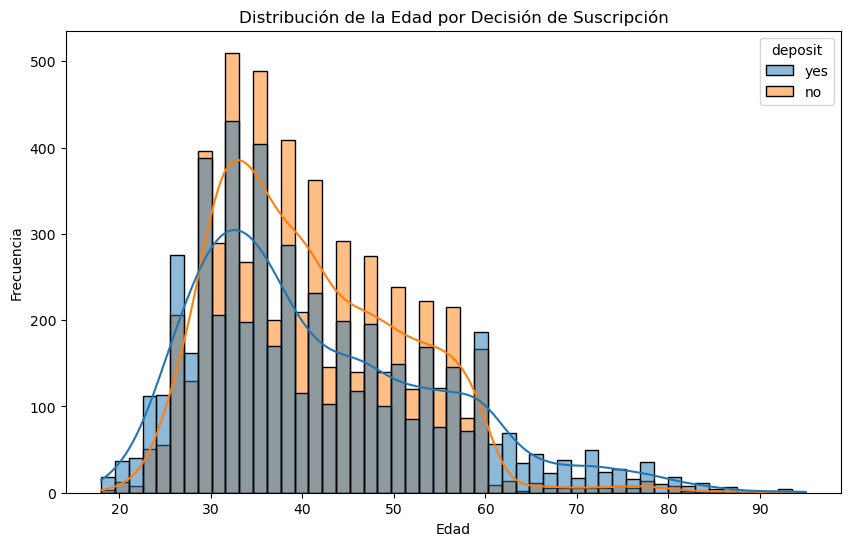

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=selected_data, x='age', hue='deposit', kde=True)
plt.title('Distribución de la Edad por Decisión de Suscripción')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Conclusiones

Tras examinar detalladamente los datos, hemos descubierto que variables demográficas como la edad, estado civil y educación, junto con factores financieros como el saldo de cuenta y los préstamos, desempeñan un papel crucial en la decisión de suscribir un depósito. Además, al analizar la influencia del método de contacto, el mes de contacto y la duración del contacto, observamos patrones interesantes que sugieren cómo estas variables pueden impactar en la decisión final. Estos hallazgos nos brindan una comprensión más profunda de los factores que influyen en la suscripción de depósitos y pueden ser útiles para diseñar estrategias de marketing más efectivas en el futuro